#                                              PREDICTING SALE_PRICE OF A HOUSE

#IMPORTING NECESSARY MODULES

In [116]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings warnings.filterwarnings("ignore")

#READING THE DATA

In [117]:
data=pd.read_csv('Raw_Housing_Prices.csv')
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##descriptive analysis of target varaible


In [118]:
#sale price is our target variable 
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# DATA CLEANING AND PRE-PROCESSING

##TREATING OUTLIERS


In [119]:
#limitvalues
q1=data['Sale Price'].quantile(0.25)
q3=data['Sale Price'].quantile(0.75)
iqr=q3-q1
up_limit=q3+1.5*iqr
lo_limit=q1-1.5*iqr
up_limit,lo_limit

(1129575.0, -162625.0)

In [120]:
def imputer_val(value):
    if value>up_limit:
        return up_limit
    elif value<lo_limit:
        return lo_limit
    else:
        return value

In [121]:
data['Sale Price']=data['Sale Price'].apply(imputer_val)

In [122]:
data['Sale Price'].describe(include='all')

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

#TREATING MISSING VALUES


In [123]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#checking distribution

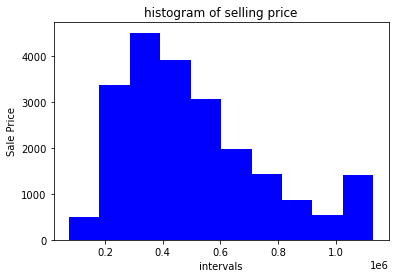

In [125]:
plt.hist(data['Sale Price'],bins=10,color='blue')
plt.xlabel('intervals')
plt.ylabel('Sale Price')
plt.title('histogram of selling price')
plt.show()

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#treating missing values in independent variables

In [127]:
numerical=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
               'Latitude','Longitude','Living Area after Renovation (in Sqft)']
for col in numerical:
    data[col].fillna(value=data[col].median(),inplace=True)
'''
from sklearn.impute import SimpleImputer

numerical=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
               'Latitude','Longitude','Living Area after Renovation (in Sqft)']
impute=SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical]=impute.fit_transform(data[numerical])
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [128]:
data['Zipcode'].fillna(value=data['Zipcode'].mode()[0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

#FEATURE ENGINEERING

In [129]:
#transforming categorial varaiable ('No of Times Visited') into a numeric so that we can find any relation#
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [130]:
mapping={'None': 0, 'Thrice':3,'Four':4,'Twice':2,'Once':1}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [131]:
#creating a new variable ever renovated which has values yes or no
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')

In [132]:
#creating yrs since renovation which would be useful for us
data['Year Sold']=pd.DatetimeIndex(data['Date House was Sold']).year

In [133]:
data['Years Since Renovated']=np.where(data['Ever Renovated']=='Yes',abs(data['Year Sold']-data['Renovated Year']),0)
#removing unnecessary columns
data.drop(columns=['Renovated Year','Date House was Sold','Year Sold'],inplace=True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovated
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [134]:
data.drop(columns='ID',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

#CREATING DUMMIES FOR CATEGORIAL VARIABLES

In [135]:
data.rename(columns={'Waterfront View':'Waterfront_View','Condition of the House':'Condition_of_the_House','Ever Renovated':'Ever_Renovated'},inplace=True)

data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovated
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [136]:
data=pd.get_dummies(data,
                   columns=['Condition_of_the_House'],
                   drop_first=True)

In [137]:
data=pd.get_dummies(data,
                   columns=['Waterfront_View','Ever_Renovated'],
                   drop_first=True)


In [138]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


#BINNING

In [139]:
zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [140]:
#creating bins
zip_table['Zipcode_group']=pd.cut(zip_table['Sale Price'],bins=10,
                labels=['Zipcode_group_0','Zipcode_group_1',
                        'Zipcode_group_2','Zipcode_group_3',
                        'Zipcode_group_4','Zipcode_group_5',
                        'Zipcode_group_6','Zipcode_group_7',
                       'Zipcode_group_8','Zipcode_group_9'],
                include_lowest=True)
zip_table.drop(columns=['Sale Price'])

,Zipcode_group
Zipcode,
98002.0,Zipcode_group_0
98168.0,Zipcode_group_0
98032.0,Zipcode_group_0
98001.0,Zipcode_group_0
98148.0,Zipcode_group_0
...,...
98109.0,Zipcode_group_6
98112.0,Zipcode_group_7
98040.0,Zipcode_group_8


In [141]:
#joining zip_table and data
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [142]:
data=data.drop(columns='Zipcode')

In [143]:
data=data.drop(columns='Sale Price_y')
data.head()

,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_group_4


In [144]:
data=pd.get_dummies(data,columns=['Zipcode_group'],drop_first=True)
data.head()

,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [145]:
data.rename(columns={'Sale Price_x':'Sale_Price'},inplace=True)
data.head()


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# IMPLEMENTING LINEAR REGRESSION

#SCALING THE DATASET

In [146]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['Sale_Price']
X=scaler.fit_transform(data.drop(columns=['Sale_Price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


#TREATING MULTI-COLLINEARITY

In [147]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [148]:
#CALCULATING VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X
vif=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
vif

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovated                           2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [149]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("no multicolinearity found")
        return data

In [150]:
for i in range(7):
    vif_data=MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
no multicolinearity found
no multicolinearity found
no multicolinearity found
no multicolinearity found
no multicolinearity found


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_group_Zipcode_group_1,Zipcode_group_Zipcode_group_2,Zipcode_group_Zipcode_group_3,Zipcode_group_Zipcode_group_4,Zipcode_group_Zipcode_group_5,Zipcode_group_Zipcode_group_6,Zipcode_group_Zipcode_group_7,Zipcode_group_Zipcode_group_8,Zipcode_group_Zipcode_group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


SPLITTING THE DATA

In [151]:
from sklearn.model_selection import train_test_split
X=vif_data
Y=data['Sale_Price']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

#IMPLEMENTING LINEAR REGRESSION

In [152]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train,y_train)
predictions=Lr.predict(x_test)
Lr.score(x_test,y_test)

0.8461987715586199

for a linear regression model this score is good

# VERIFYING THE ASSUMPTIONS OF LINEAR REGRESSION

#RESIDUALS

In [153]:
residuals=predictions-y_test

residual_table=pd.DataFrame({'residuals':residuals,
                              'predictions':predictions}).sort_values(by='predictions')

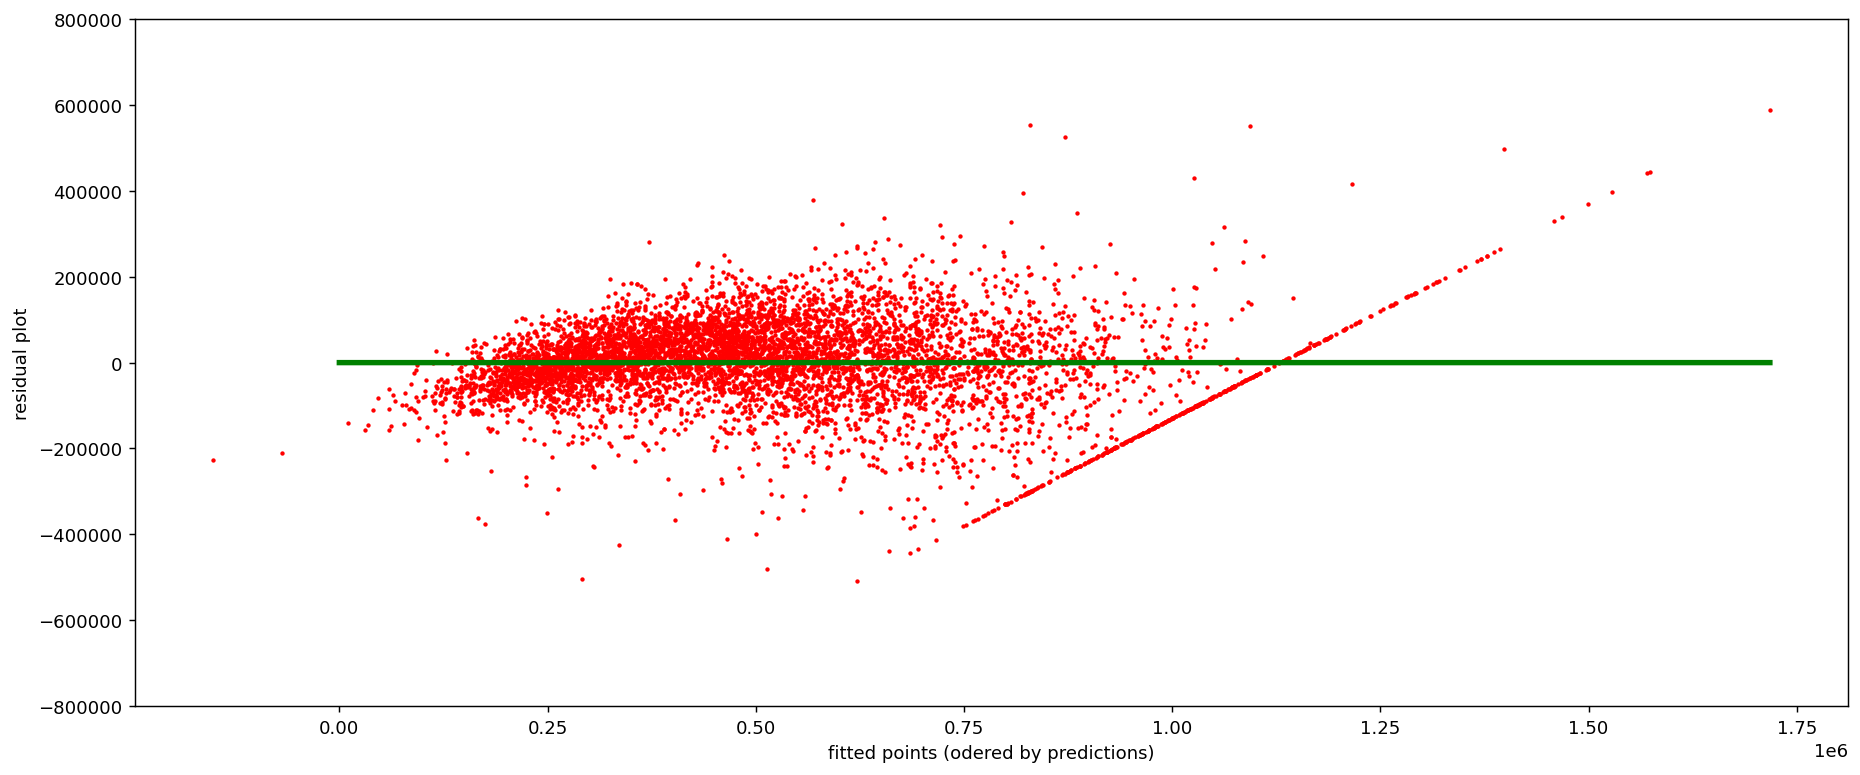

In [154]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]
plt.figure(figsize=(17,7),dpi=130)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,linewidth=3,color='green',label='regression_line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points (odered by predictions)')
plt.ylabel('residual plot')
plt.show()

we can see that most of the residuals are densly populated between the limits (-200000,200000), so there is a good probability that the residuals are normally distributed and there are some outliers which the data did not explain

#DISTRIBUTION OF ERRORS

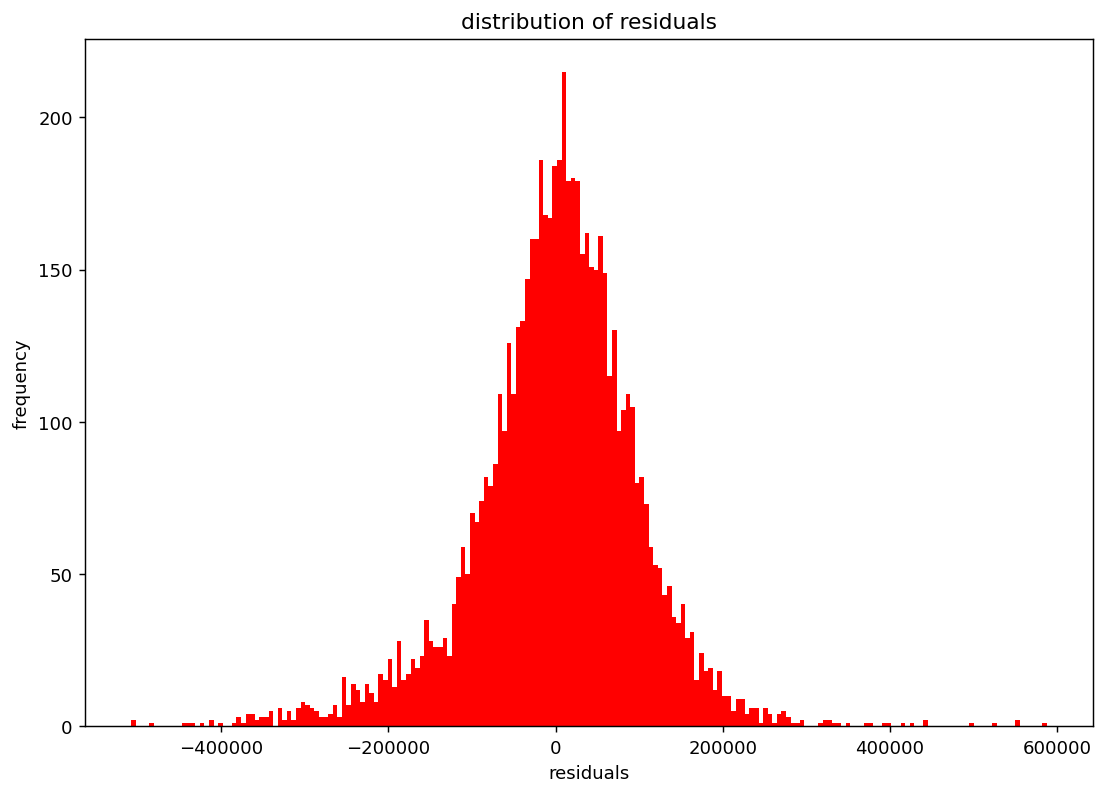

In [155]:
plt.figure(dpi=130,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

we can clearly see that the bulk of the residuals follow normal distribution 

# INTERPRETING THE RESULTS OF OUR MODEL

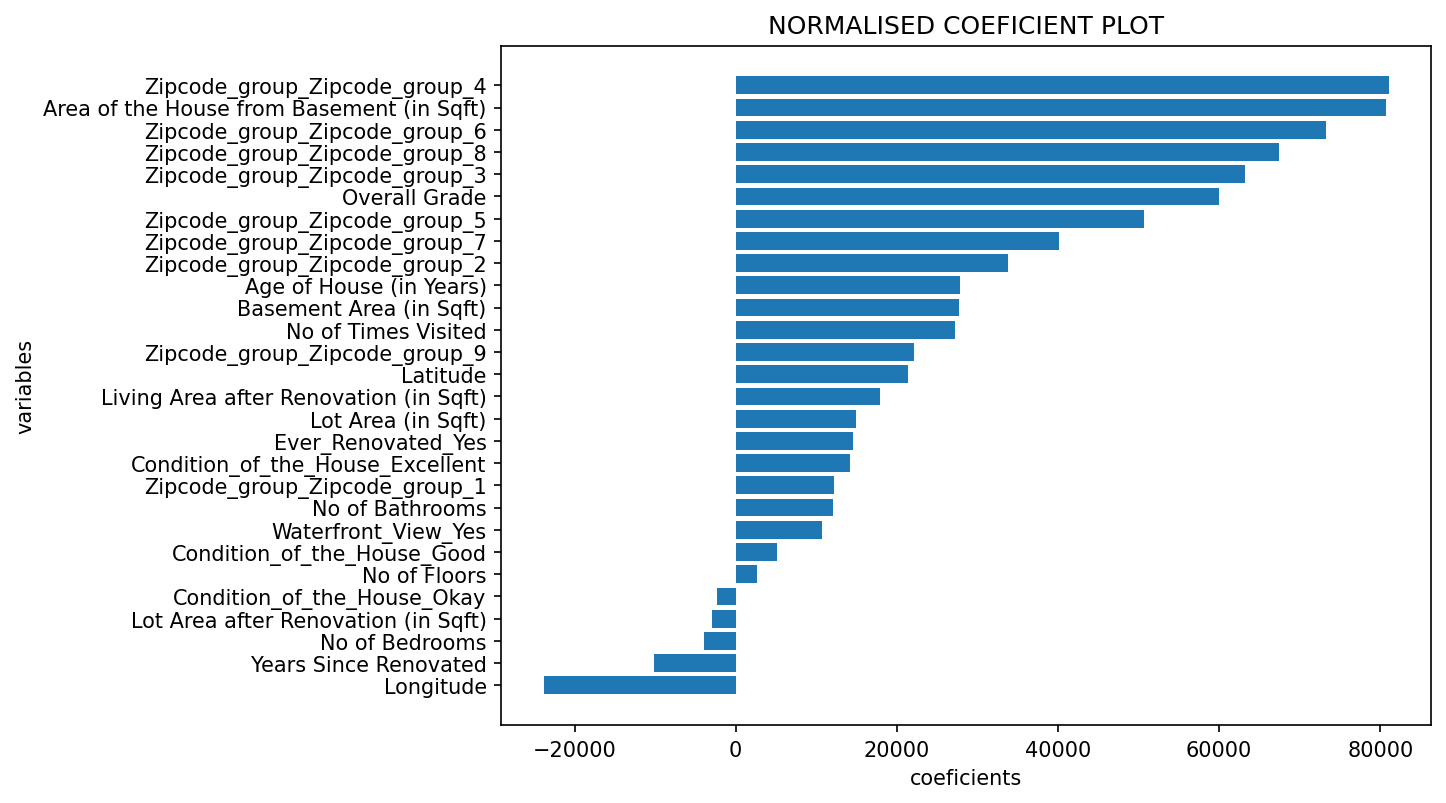

In [156]:
coeff_table=pd.DataFrame({'column':x_train.columns,'co_efficients':Lr.coef_})
coeff_table=coeff_table.sort_values(by='co_efficients')
plt.figure(figsize=(8,6),dpi=150)
x=coeff_table['column']
y=coeff_table['co_efficients']
plt.barh(x,y)
plt.xlabel('coeficients')
plt.ylabel('variables')
plt.title('NORMALISED COEFICIENT PLOT')
plt.show()

We can see that Zipcode_groups,area of the house  has played important in the increasing the value of our sale price and Longitude has played important in the decresing the value of our sale price 